<a href="https://colab.research.google.com/github/shantanushrivastava/machine_learning/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Generate synthetic business data for logistic regression
np.random.seed(42)  # For reproducibility

# Independent variable: Customer Age
customer_age = np.random.randint(18, 65, 100)  # Age between 18 and 65

# Dependent variable: Purchase Decision (0 or 1)
# Probability of purchase increases with age (simplified model)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate probabilities and binary outcomes
purchase_prob = sigmoid((customer_age - 40) / 5)  # Centered around age 40
purchase_decision = np.random.binomial(1, purchase_prob)

# Create a DataFrame
data = pd.DataFrame({
    'Customer_Age': customer_age,
    'Purchase_Decision': purchase_decision
})

# Save the dataset to a CSV file
data.to_csv('business_logistic_regression_dataset.csv', index=False)

print("Dataset saved as 'business_logistic_regression_dataset.csv'")

Dataset saved as 'business_logistic_regression_dataset.csv'


Missing values:
 Customer_Age         0
Purchase_Decision    0
dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        17

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[12  1]
 [ 0 17]]

Accuracy: 0.9666666666666667


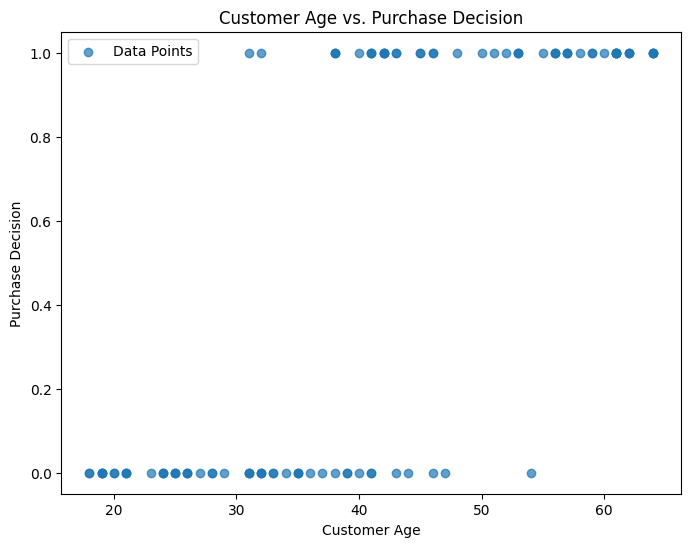

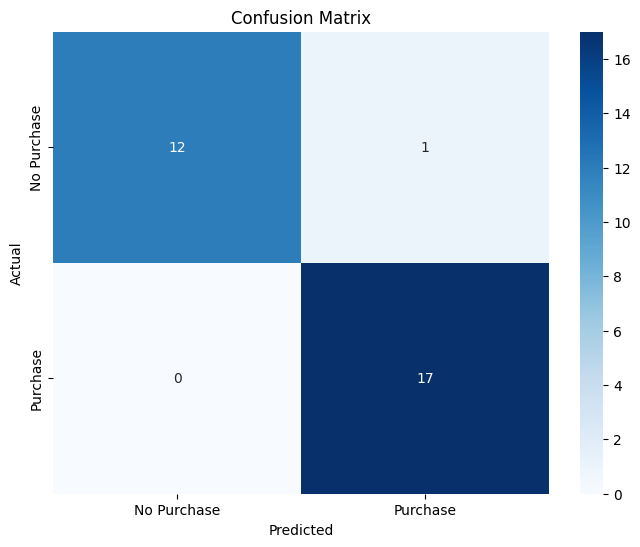


Model Coefficients:
 [[2.13844671]]
Intercept: [0.05264233]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('business_logistic_regression_dataset.csv')

print("Missing values:\n", df.isnull().sum())

X = df[['Customer_Age']]
y = df['Purchase_Decision']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=59)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)

plt.figure(figsize=(8, 6))
plt.scatter(df['Customer_Age'], df['Purchase_Decision'], alpha=0.7, label='Data Points')
plt.xlabel('Customer Age')
plt.ylabel('Purchase Decision')
plt.title('Customer Age vs. Purchase Decision')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nModel Coefficients:\n", model.coef_)
print("Intercept:", model.intercept_)
